In [1]:
import optimistix as optx
import jax.numpy as jnp
from jax import vmap
import jax.random as random

import jdgsim

import matplotlib.pyplot as plt

# Newton method


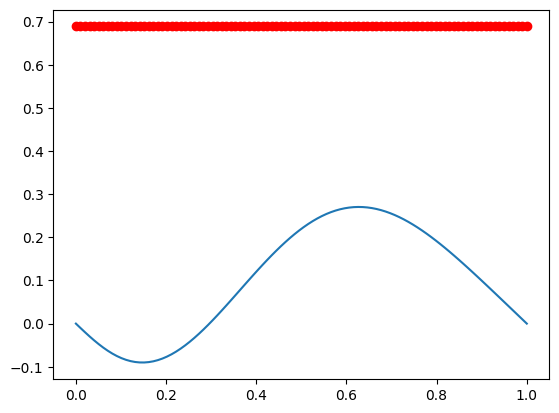

In [21]:
def G(q, args):
    return  1287/16 * ((-2*(1-q)**(9/2))*(99*q**2+36*q+8)/1287 +16/1287) - args

# sol = optx.fixed_point(G, solver, y0[0],  options=dict(lower=0, upper=1))

def vmap_solver(y0):
    solver = optx.Bisection(rtol=1e-5, atol=1e-5, )
    return optx.root_find(G, solver, y0, args=random.uniform(key=random.PRNGKey(0)), options=dict(lower=0, upper=1)).value

y0 = jnp.linspace(0, 1, num=100)
y1 = vmap(vmap_solver)(y0)
plt.plot(y0, G(y0, y0))
plt.scatter(y0, y1, color='red')


# Inverse cdf interpolation


(0.0, 1.0)

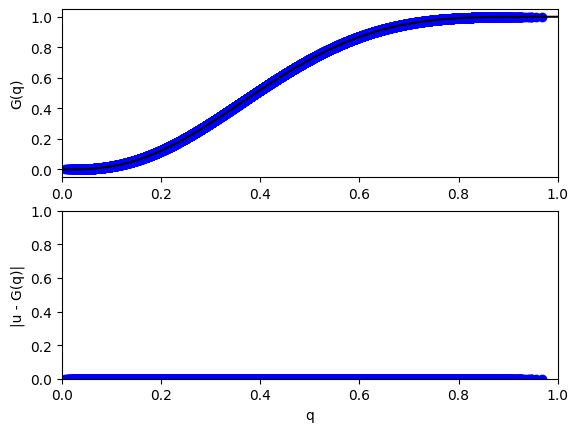

In [18]:
fig = plt.figure()

def G(q, ):
    return 1287/16 * ((-2*(1-q)**(9/2))*(99*q**2+36*q+8)/1287 +16/1287) 

q = jnp.linspace(0, 1, num=10_000_000)
y = G(q, )

ax = fig.add_subplot(211)
ax.plot(q, y, color='black')

u = random.uniform(key=random.PRNGKey(0), shape=(100_000,))
sample = jnp.interp(u, y, q)
ax.scatter(sample, u, color='blue')
ax.set_ylabel('G(q)')
ax.set_xlim(0, 1)

ax = fig.add_subplot(212)
ax.scatter(sample, abs(u-G(sample)), color='blue')
ax.set_xlabel('q')
ax.set_ylabel('|u - G(q)|')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

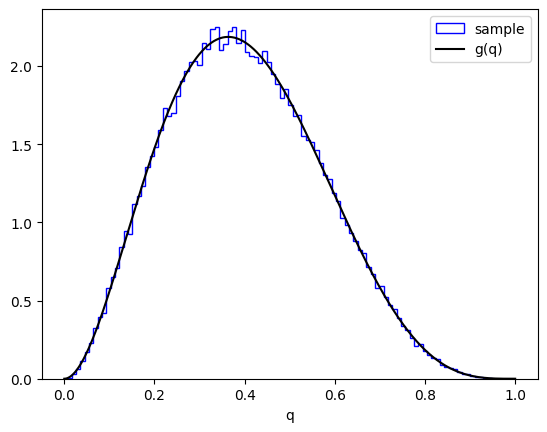

In [20]:
plt.hist(sample, histtype='step', color='blue',bins=100, density=True, label='sample')
q = jnp.linspace(0, 1, num=100_000)
y = 1287/16*((1-q)**(7/2))*q**2 
plt.plot(q, y, color='black', label='g(q)')
plt.xlabel('q')
plt.legend()